In [11]:
%matplotlib inline

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="codigo">
</form>''')

Para:

$Z = {Vmax\over(R²-Rmax)}- e^{-R²}$

$Z = Vmax*e^{-R²}$
     
$Z = \sin( R )$
     
$ Z = \sin(R) - e^{-R²}$
     
$ Z = (1 - {X\over2} + X^5 + Y^3)- e^{(-X^2-Y^2)}$

Patrón:

Divergete: $ v_\nabla = {\Delta Z_y \over \Delta Y} , u_\nabla = {\Delta Z_x \over \Delta X}$

Vorticial: $ v_\zeta = -{\Delta Z_x \over \Delta X} , u_\zeta = {\Delta Z_y \over \Delta Y}$

Remolinos: $ V = v_\nabla - v_\zeta , U = u_\nabla + u_\zeta $

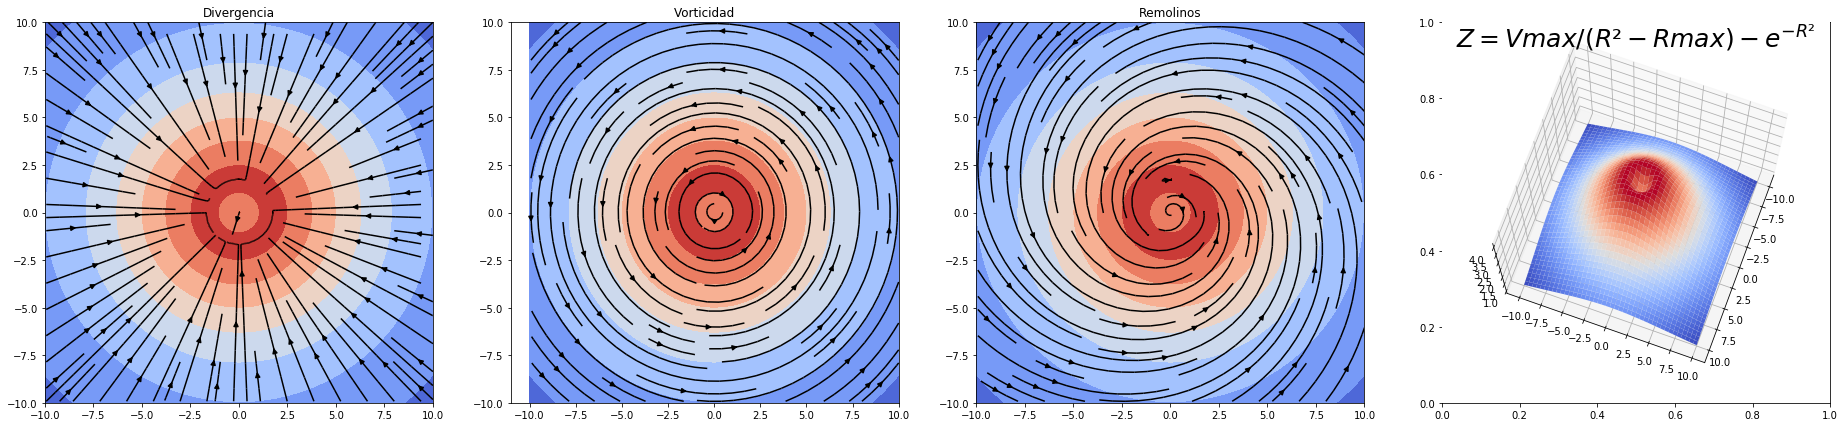

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

# make a stream function:

x = np.linspace(-10, 10, 252)
y = np.linspace(-10, 10, 252)

#x = np.arange(-3, 4, 0.05)
#y = np.arange(-3, 4, 0.05)

X, Y = np.meshgrid(x, y)

Dx = Dy =20/252  #0.05

Vmax = 180
Rmax = 40

R = np.sqrt(X**2 + Y**2)*.9

#Z = (1 - X/2 + X**5 + Y**3) * np.exp(-R**2)
#Z = np.sin (R)
#Z = Vmax*np.exp(-R**2)
#Z =  np.sin(R)- np.exp(-R**2)
Z = Vmax/(R**2+Rmax) -  np.exp(-R**2 )

#text = "$Z = (1 - {X/2} + X^5 + Y^3)- e^{(-X^2-Y^2)}$"
#text = "$Z = \sin( R )$"
#text = "$Z = Vmax*e^{-R²}$"
#text = "$ Z = \sin(R) - *e^{-R²}$"
text = "$Z = {Vmax/(R²-Rmax)}- e^{-R²}$"

# vorticidad(%)  + divergencia(%) = 100%

fv = 0.8
fd = 1 - fv

# make U and V out of the streamfunction:

#divergencia
Vd = np.diff(Z[:,1:], axis=0)/Dy * fd 
Ud = np.diff(Z[1:,:],  axis=1)/Dx* fd 

# plot:
fig, ax = plt.subplots(1,4,figsize=(32,7))
ax[0].contourf(X, Y, Z, cmap=cm.coolwarm)
ax[0].streamplot(X[1:, 1:], Y[1:, 1:], Ud, Vd, color="k", density=1)
ax[0].set_title("Divergencia")

#vorticidad
Vv =-np.diff(Z[1:,:], axis=1)/Dx * fv
Uv = np.diff(Z[:,1:], axis=0)/Dy * fv

# plot:
ax[1].contourf(X, Y, Z, cmap=cm.coolwarm)
ax[1].streamplot(X[1:, 1:], Y[1:, 1:], Uv, Vv, color="k", density=1)
ax[1].set_title("Vorticidad")

#Remolino
V = Vv + Vd
U = Uv + Ud 

# plot:
ax[2].contourf(X, Y, Z, cmap=cm.coolwarm)
ax[2].streamplot(X[1:, 1:], Y[1:, 1:], U, V, color="k", density=1)
ax[2].set_title("Remolinos")

#Campo Z
ax=fig.add_subplot(1, 4, 4, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(75, 20)

#ax.set_title("$R*e⁽-R²⁾$")
#ax.set_title("$sin(R)-e⁽R²⁾$")
ax.set_title(text, fontsize=25)

plt.show()

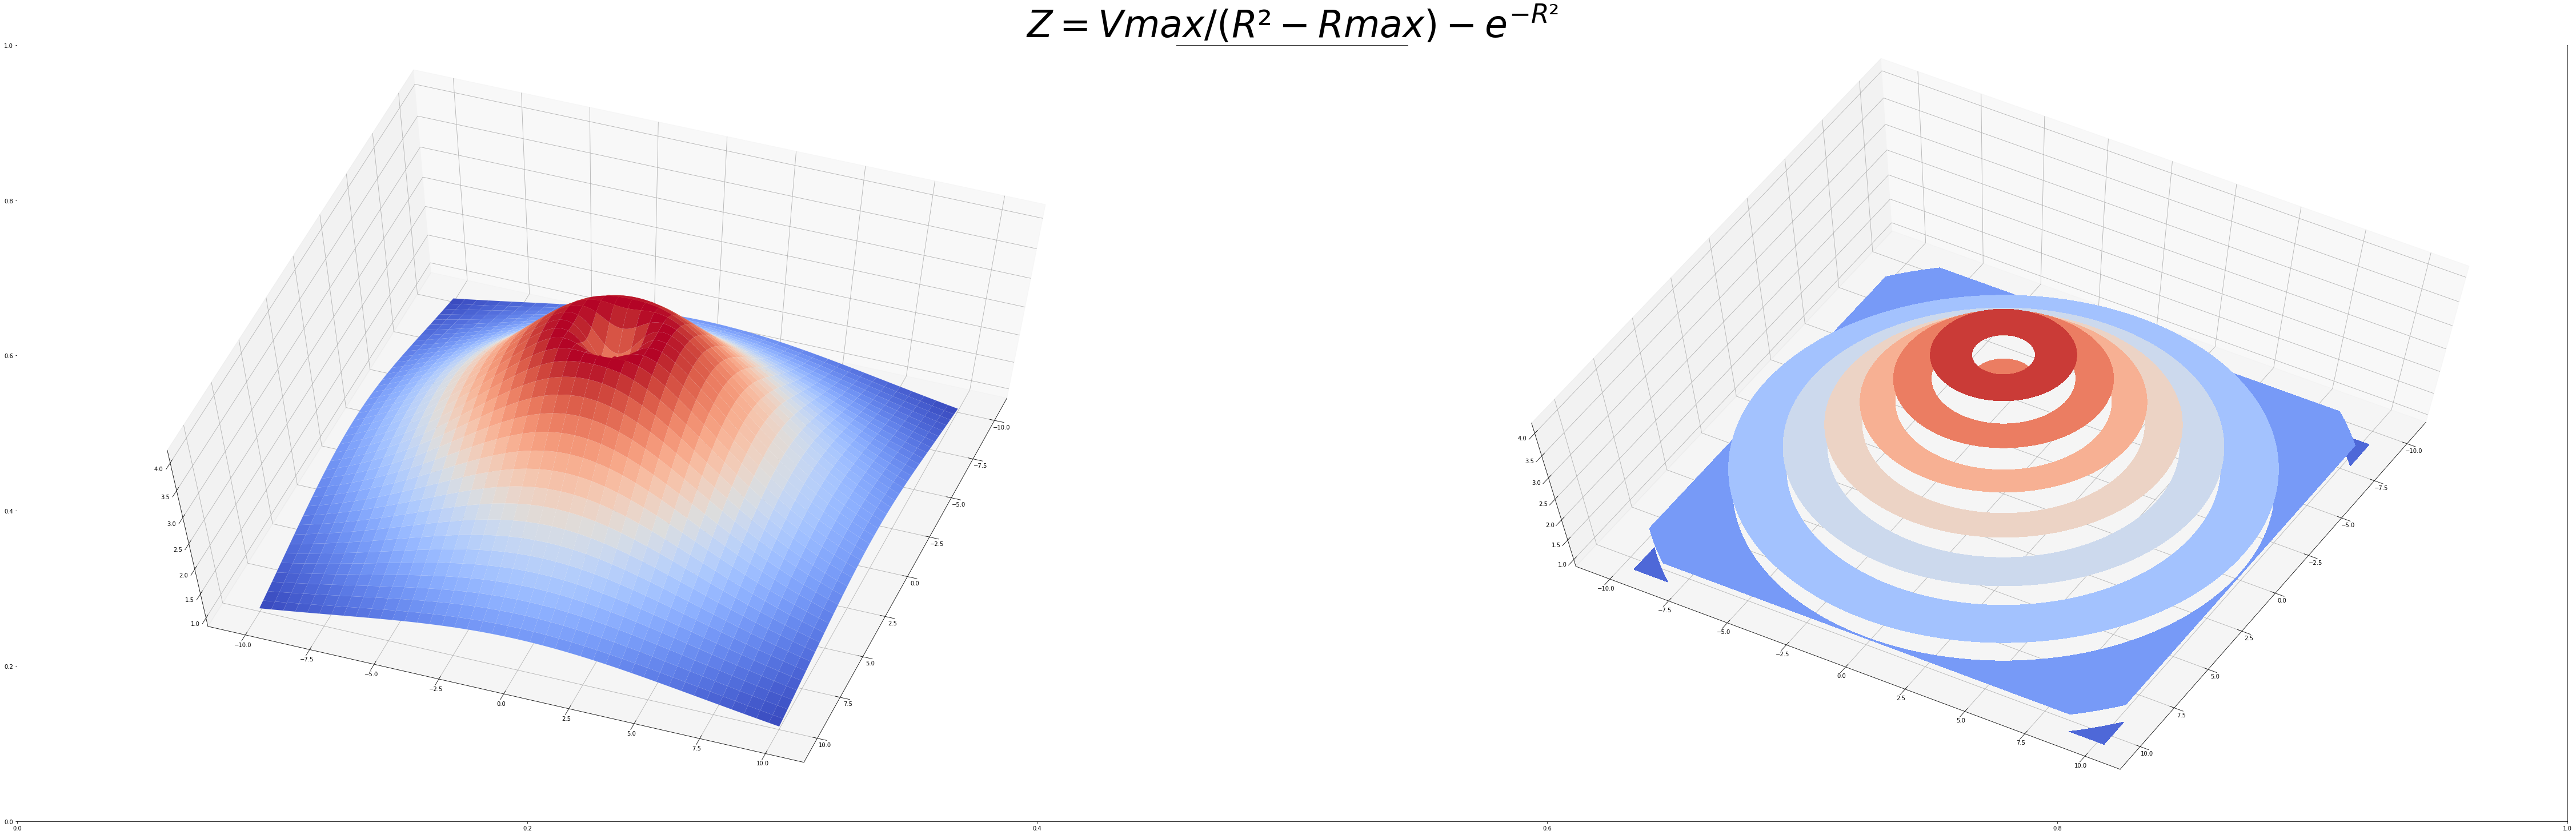

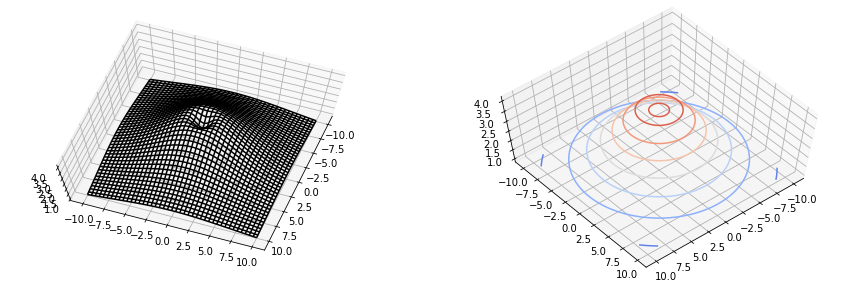

In [14]:
fig, ax=plt.subplots(figsize=(80,25))
ax.set_title(text, fontsize=65)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(65, 20)  

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(70, 30)             

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
ax.view_init(75, 20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour(X, Y, Z, stride = 5, cmap=cm.coolwarm)
ax.view_init(65, 50)


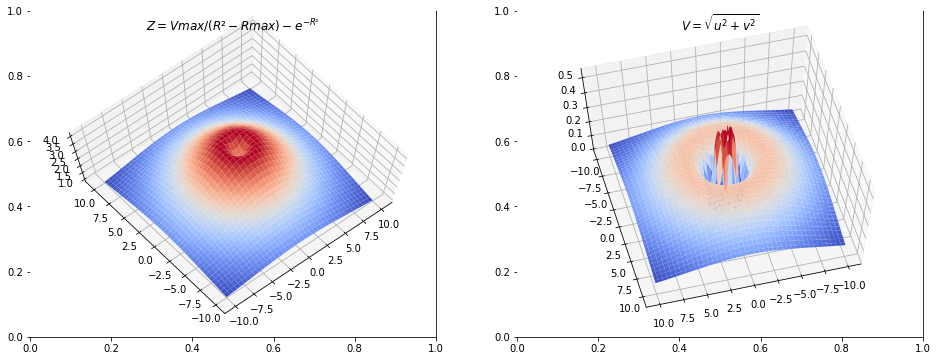

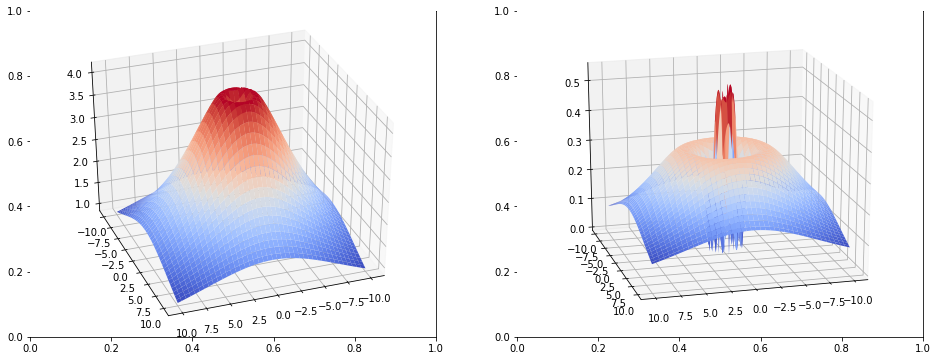

In [15]:
Va = np.sqrt(V**2 + U**2)

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax=fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_title(text)
ax.view_init(75, 230)

ax=fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X[1:, 1:], Y[1:, 1:], Va, cmap=cm.coolwarm)
ax.set_title("$V = \sqrt{u^2 + v^2}$")
ax.view_init(65, 75)
plt.show()

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax=fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(35, 70)

ax=fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X[1:, 1:], Y[1:, 1:], Va, cmap=cm.coolwarm)
ax.view_init(20, 75)
plt.show()

